# Penguin analyse
* 1. Prepare data
* 2. Check top 10 the biggest penguins (from length)
* 3. Average dimensions of penguins
* 4. Correlation matrix
* 5. Principal Component Analysis (PCA)

## Data consists of:
* Species - Penguin species
* Island - Island the penguin belongs to
* Culmen_Length_mm - length of the penguin
* Culmen_Depth_mm - depth of the penguin
* Flipper_Length_mm - flipper length of the penguin
* Body_Mass_g - Body mass of the penguin
* Sex - Gender of the penguin
Data is from [Kaggle](https://www.kaggle.com/datasets/amulyas/penguin-size-dataset)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import cycle

### 1. Prepare data

In [2]:
# Load data
df = pd.read_csv("data/penguins_size.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# Check na in data
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
# Fill na with mean values
df["culmen_length_mm"].fillna(df["culmen_length_mm"].mean(), inplace=True)
df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].mean(), inplace=True)
df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean(), inplace=True)
df["body_mass_g"].fillna(df["body_mass_g"].mean(), inplace=True)
df["sex"].fillna(df["sex"].mode()[0], inplace=True)

In [6]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### 2. Check top 10 the biggest penguins (from length)

In [7]:
top_10_biggest_penguins = df.sort_values(by=["culmen_length_mm"], ascending=[False]).head(10)

In [8]:
top_10_biggest_penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,FEMALE
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,MALE
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,MALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,MALE
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,MALE
191,Chinstrap,Dream,53.5,19.9,205.0,4500.0,MALE
327,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,MALE
181,Chinstrap,Dream,52.8,20.0,205.0,4550.0,MALE


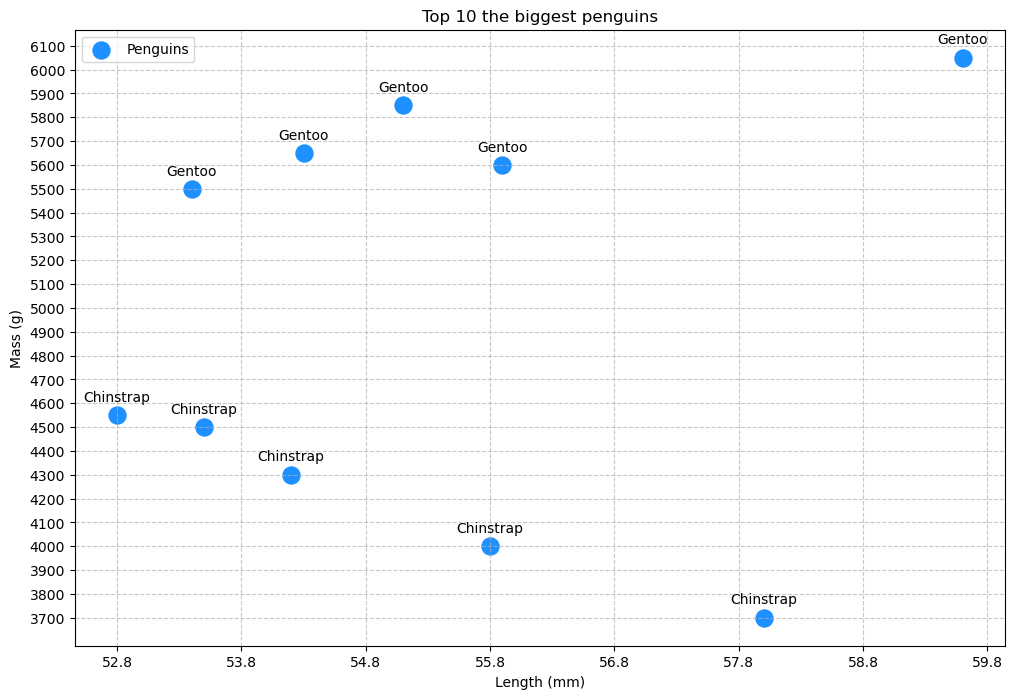

In [9]:
# Let's plot top 10

penguin_labels = top_10_biggest_penguins["species"]
penguin_lengths = top_10_biggest_penguins["culmen_length_mm"]
penguin_mass = top_10_biggest_penguins["body_mass_g"]

plt.figure(figsize=(12, 8))
plt.scatter(penguin_lengths, penguin_mass, color="dodgerblue", marker="o", s=150, label="Penguins")

for label, length, mass, in zip(penguin_labels, penguin_lengths, penguin_mass):
    plt.annotate(label, (length, mass), textcoords="offset points", xytext=(0,10), ha="center")
    
plt.xlabel("Length (mm)")
plt.ylabel("Mass (g)")
plt.title("Top 10 the biggest penguins")
plt.legend()

# Grid for better readability
plt.grid(True, linestyle="--", alpha=0.7)

# Adjust x-axis and y-axis ticks for increased precision
plt.xticks(np.arange(min(penguin_lengths), max(penguin_lengths)+1, 1))
plt.yticks(np.arange(min(penguin_mass), max(penguin_mass)+100, 100))


plt.show()

### 3. Average dimensions of penguins

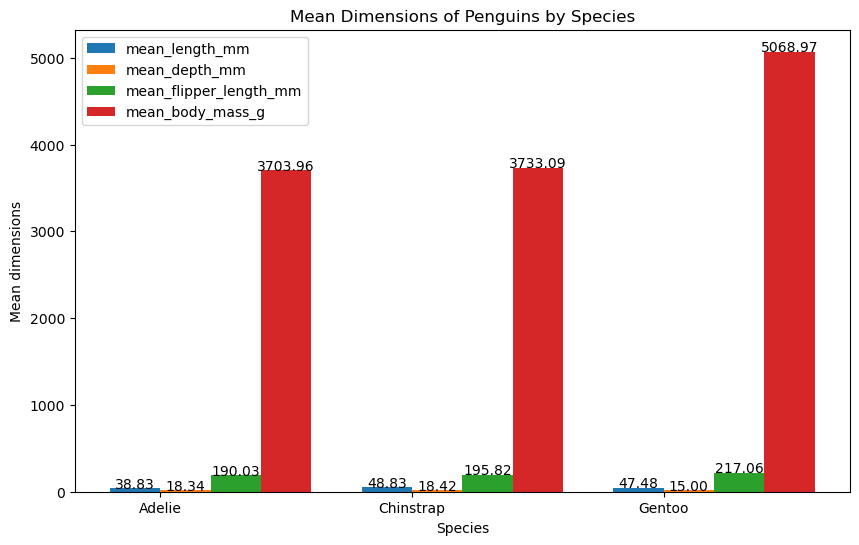

In [10]:
# Split on species for take out means for each species
adelie_data = df[df["species"] == "Adelie"]
chinstrap_data = df[df["species"] == "Chinstrap"]
gentoo_data = df[df["species"] == "Gentoo"]

data_avg = {
    "species": 
        ["Adelie", "Chinstrap", "Gentoo"],
    "mean_length_mm": 
        [adelie_data["culmen_length_mm"].mean(), chinstrap_data["culmen_length_mm"].mean(), gentoo_data["culmen_length_mm"].mean()],
    "mean_depth_mm": 
        [adelie_data["culmen_depth_mm"].mean(), chinstrap_data["culmen_depth_mm"].mean(), gentoo_data["culmen_depth_mm"].mean()],
    "mean_flipper_length_mm": 
        [adelie_data["flipper_length_mm"].mean(), chinstrap_data["flipper_length_mm"].mean(), gentoo_data["flipper_length_mm"].mean()],
    "mean_body_mass_g": 
        [adelie_data["body_mass_g"].mean(), chinstrap_data["body_mass_g"].mean(), gentoo_data["body_mass_g"].mean()]
}

df_means = pd.DataFrame(data_avg)

# Convert columns from int on float
numeric_columns = ["mean_length_mm", "mean_depth_mm", "mean_flipper_length_mm", "mean_body_mass_g"]
df_means[numeric_columns] = df_means[numeric_columns].apply(pd.to_numeric, errors="coerce")


plt.figure(figsize=(10,6))
bar_width = 0.20

# Create bars
for i, col in enumerate(numeric_columns):
    plt.bar(df_means.index + i * bar_width, df_means[col], width=bar_width, label=col)
    # Add values to bars
    for index, value in enumerate(df_means[col]):
        plt.text(df_means.index[index] + i * bar_width, value + 0.1, f'{value:.2f}', ha='center')

plt.xlabel("Species")
plt.ylabel("Mean dimensions")
plt.title("Mean Dimensions of Penguins by Species")
plt.xticks(df_means.index + bar_width / 2, df_means["species"])
plt.legend()

plt.show()

### 4. Correlation matrix

In [11]:
correlation_matrix = df_means.corr()
correlation_matrix

C:\Users\barto\AppData\Local\Temp\ipykernel_17184\406968930.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_means.corr()


,mean_length_mm,mean_depth_mm,mean_flipper_length_mm,mean_body_mass_g
mean_length_mm,1.000000,-0.368308,0.567416,0.404926
mean_depth_mm,-0.368308,1.000000,-0.974531,-0.999212
mean_flipper_length_mm,0.567416,-0.974531,1.000000,0.982665
mean_body_mass_g,0.404926,-0.999212,0.982665,1.000000


* mean_length_mm (mean body length) is positively correlated with mean_flipper_length_mm (mean flipper length). The larger the mean body length, the larger the mean flipper length.

* mean_length_mm (mean body length) is moderately positively correlated with mean_body_mass_g (mean body mass). The larger the mean body length, the larger the mean body mass.

* mean_depth_mm (mean body depth) is moderately negatively correlated with mean_flipper_length_mm (mean flipper length) and mean_body_mass_g (mean body mass). The larger the mean body depth, the smaller the mean flipper length and body mass.

* mean_flipper_length_mm (mean flipper length) is strongly negatively correlated with mean_depth_mm (mean body depth) and mean_body_mass_g (mean body mass). The larger the mean flipper length, the smaller the mean body depth and body mass.

* mean_body_mass_g (mean body mass) is strongly negatively correlated with mean_depth_mm (mean body depth) and mean_flipper_length_mm (mean flipper length). The larger the mean body mass, the smaller the mean body depth and flipper length.

### 5. Principal Component Analysis (PCA)

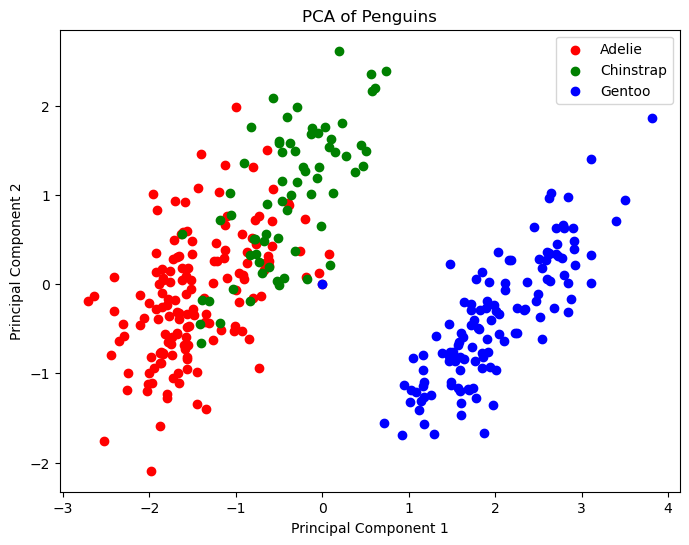

In [12]:
# Drop string values
df_pca = df.drop(["species", "sex", "island"], axis=1)

#Data standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Pca with 2 main components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
df_pca["species"] = df["species"]

# Plot
plt.figure(figsize=(8,6))
colors = {"Adelie": "red", "Chinstrap": "green", "Gentoo": "blue"}

for species, color in colors.items():
    subset = df_pca[df_pca["species"]==species]
    plt.scatter(subset["PC1"], subset["PC2"], label=species, color=color)
    
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Penguins")
plt.legend()

plt.show()

1. Adelie Penguins (red dots):

* Mainly clustered around negative values of Principal Component 1 (PC1).
* This suggests that Adelie penguins share certain features (in the sense that they are clustered in one region of the feature   space), and these features are represented by negative values of PC1.
  
2. Chinstrap Penguins (green dots):

* Overlap with the Adelie region but are more scattered along both Principal Component 1 and Principal Component 2 (PC1 and  PC2).
* This indicates that Chinstrap penguins have greater variability or are more diverse in terms of features compared to Adelie   penguins.
  
3. Gentoo Penguins (blue dots):

* Clearly separated from the other species.
* Concentrated around positive values of Principal Component 1 (PC1).
* This means that Gentoo penguins differ from the other species in a direction represented by positive values of PC1.